In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

4422102/4422102 [==============================] - 1s 0us/step


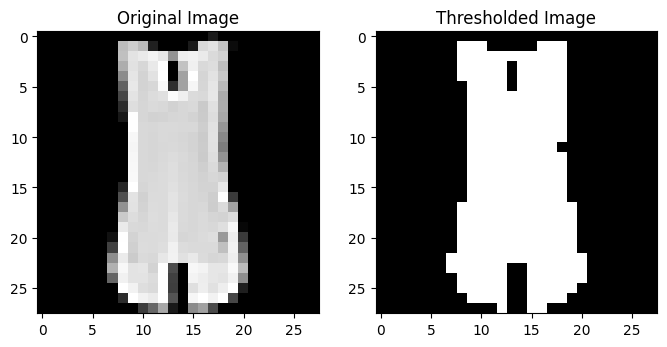

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (_, _) = fashion_mnist.load_data()

example_image = train_images[4]

# Define the thresholding function
def thresholding(img, threshold=127):
    new_img = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            if img[i][j] >= threshold:
                new_img[i][j] = 255
            else:
                new_img[i][j] = 0
    return new_img

threshold_img = thresholding(example_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(example_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(threshold_img, cmap='gray')
plt.title('Thresholded Image')

plt.show()

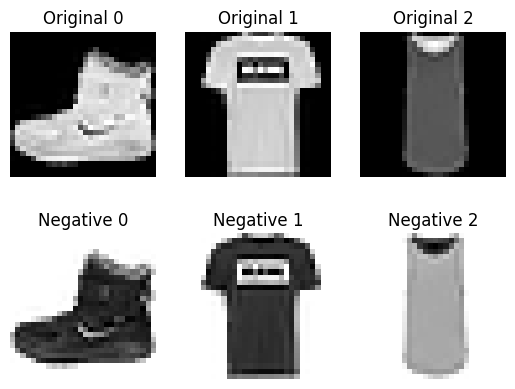

In [ ]:
# Perform image negative transformation
negative_images = 255 - train_images

# Display original and negative images side by side
num_images_to_display = 3

for i in range(num_images_to_display):
    # Original Image
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')

    # Negative Image
    plt.subplot(2, num_images_to_display, i + num_images_to_display + 1)
    plt.imshow(negative_images[i], cmap='gray')
    plt.title(f"Negative {i}")
    plt.axis('off')

plt.show()


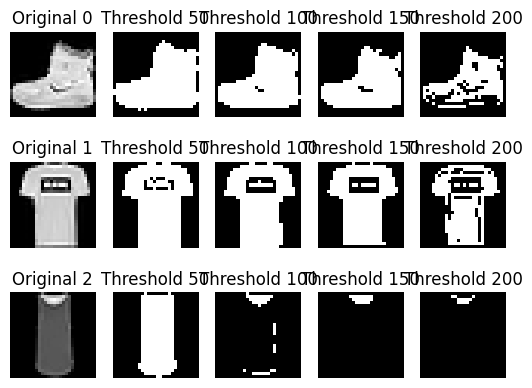

In [ ]:
import numpy as np
threshold_levels = [50, 100, 150, 200]

# Display original and thresholded images for each level
num_images_to_display = 3

for i in range(num_images_to_display):
    # Original Image
    plt.subplot(num_images_to_display, len(threshold_levels) + 1, i * (len(threshold_levels) + 1) + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')

    # Thresholded Images
    for j, threshold in enumerate(threshold_levels):
        thresholded_image = (train_images[i] > threshold).astype(np.uint8) * 255

        plt.subplot(num_images_to_display, len(threshold_levels) + 1, i * (len(threshold_levels) + 1) + j + 2)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(f"Threshold {threshold}")
        plt.axis('off')

plt.show()

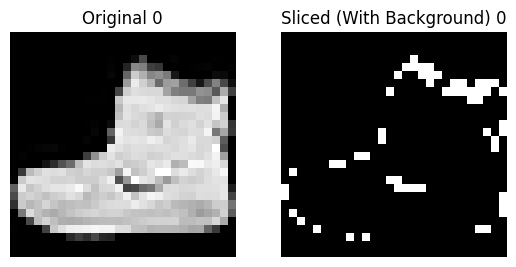

In [ ]:
# Define the gray level slicing parameters
lower_threshold = 50
upper_threshold = 150
background_value = 0

# Perform gray level slicing with background intensity slicing for one image
def gray_level_slicing_with_background(image, lower_threshold, upper_threshold, background_value):
    result_image = np.full_like(image, background_value)
    result_image[(image >= lower_threshold) & (image <= upper_threshold)] = 255
    return result_image

# Display original and processed images for one image
num_images_to_display = 1

for i in range(num_images_to_display):
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')

    # Gray level slicing with background intensity slicing
    sliced_image_with_bg = gray_level_slicing_with_background(train_images[i], lower_threshold, upper_threshold, background_value)
    plt.subplot(1, 2, 2)
    plt.imshow(sliced_image_with_bg, cmap='gray')
    plt.title(f"Sliced (With Background) {i}")
    plt.axis('off')

plt.show()

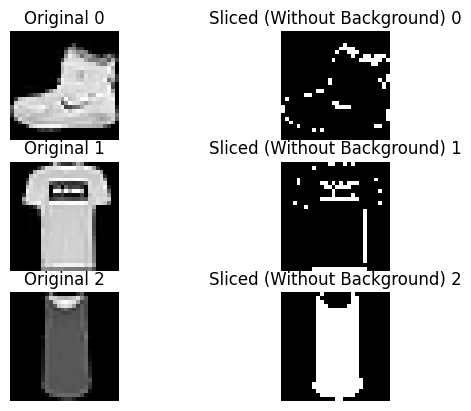

In [ ]:
# Perform gray level slicing without background intensity slicing
def gray_level_slicing(image, lower_threshold, upper_threshold):
    result_image = np.zeros_like(image)
    result_image[(image >= lower_threshold) & (image <= upper_threshold)] = 255
    return result_image

# Display original and processed images
num_images_to_display = 3
lower_threshold = 50
upper_threshold = 150

for i in range(num_images_to_display):
    # Original Image
    plt.subplot(num_images_to_display, 2, i * 2 + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')

    # Gray level slicing without background intensity slicing
    sliced_image = gray_level_slicing(train_images[i], lower_threshold, upper_threshold)
    plt.subplot(num_images_to_display, 2, i * 2 + 2)
    plt.imshow(sliced_image, cmap='gray')
    plt.title(f"Sliced (Without Background) {i}")
    plt.axis('off')

plt.show()